<a href="https://colab.research.google.com/github/advik-7/Agents/blob/main/3_layer_MultiAgent_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
cat="/content/Cat.jpeg"
tiger="/content/Tiger.jpeg"
lion="/content/lion.jpeg"
panda="/content/panda.jpeg"

Animal Image Display System

Please type the animal you want to see (e.g., cat, tiger, lion, panda):
> tiger

Processing input...


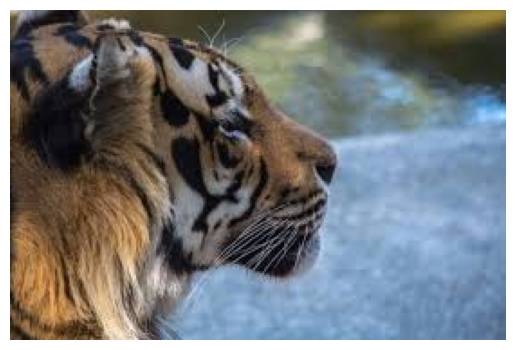

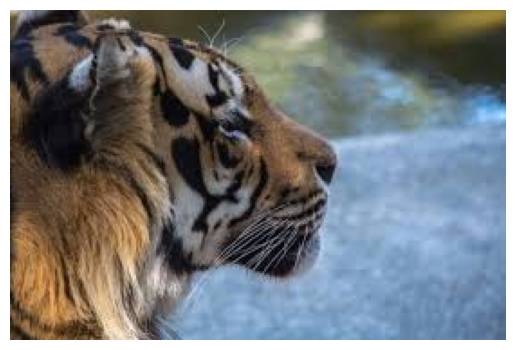


--- Final Results ---
IntermediateAgent1: Displaying Tiger Image
IntermediateAgent2: Displaying Tiger Image


In [12]:
from langchain_core.tools import tool
import matplotlib.pyplot as plt
from transformers import pipeline
from PIL import Image


@tool
def display_cat_image(tool_input: str) -> str:
    """
    Displays the cat image using matplotlib in a Colab environment.
    """
    cat_path = "/content/Cat.jpeg"
    img = Image.open(cat_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Cat Image"

@tool
def display_tiger_image(tool_input: str) -> str:
    """
    Displays the tiger image using matplotlib in a Colab environment.
    """
    tiger_path = "/content/Tiger.jpeg"
    img = Image.open(tiger_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Tiger Image"


@tool
def display_lion_image(tool_input: str) -> str:
    """
    Displays the lion image using matplotlib in a Colab environment.
    """
    lion_path = "/content/lion.jpeg"
    img = Image.open(lion_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Lion Image"


@tool
def display_panda_image(tool_input: str) -> str:
    """
    Displays the panda image using matplotlib in a Colab environment.
    """
    panda_path = "/content/panda.jpeg"
    img = Image.open(panda_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return "Displaying Panda Image"


def decide_task(input_text: str) -> str:
    """
    Decides which image to display based on the input text using a zero-shot classification model.

    Args:
        input_text (str): The input text specifying the animal to display.

    Returns:
        str: The name of the image to display (cat, tiger, lion, or panda).
    """
    classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
    candidate_labels = ["cat", "tiger", "lion", "panda"]
    classification_results = classifier(input_text, candidate_labels=candidate_labels)
    top_task = classification_results["labels"][0]
    return top_task

class RootAgent:
    """
    Root agent responsible for executing the display function for an image.

    Attributes:
        name (str): The name of the root agent.
        display_function (function): The function responsible for displaying an image.
    """
    def __init__(self, name, display_function):
        """
        Initializes the RootAgent with a name and display function.

        Args:
            name (str): The name of the root agent.
            display_function (function): The function responsible for displaying an image.
        """
        self.name = name
        self.display_function = display_function

    def execute_task(self):
        """
        Executes the task by calling the display function.

        Returns:
            str: The result message from the display function.
        """
        result = self.display_function("")
        return result

class IntermediateAgent:
    """
    Intermediate agent responsible for deciding which root agent to use and executing the task.

    Attributes:
        agents_map (dict): A map of task labels to root agents.
    """
    def __init__(self, agents_map):
        """
        Initializes the IntermediateAgent with a map of root agents.

        Args:
            agents_map (dict): A dictionary mapping task labels to root agents.
        """
        self.agents_map = agents_map

    def decide_and_execute(self, input_text: str):
        """
        Decides which root agent to use based on the input text and executes the task.

        Args:
            input_text (str): The input text specifying the animal to display.

        Returns:
            str: The result of the root agent's task.
        """
        predicted_task = decide_task(input_text)
        chosen_agent = self.agents_map[predicted_task]
        return chosen_agent.execute_task()


class MainAgent:
    """
    Main agent responsible for distributing tasks to multiple intermediate agents.

    Attributes:
        intermediate_agents (list): A list of intermediate agents.
    """
    def __init__(self, intermediate_agents):
        """
        Initializes the MainAgent with a list of intermediate agents.

        Args:
            intermediate_agents (list): A list of intermediate agents.
        """
        self.intermediate_agents = intermediate_agents

    def distribute_tasks(self, input_text: str):
        """
        Distributes the task to intermediate agents and collects results.

        Args:
            input_text (str): The input text specifying the animal to display.

        Returns:
            dict: A dictionary containing results from each intermediate agent.
        """
        results = {}
        for idx, agent in enumerate(self.intermediate_agents, start=1):
            results[f"IntermediateAgent{idx}"] = agent.decide_and_execute(input_text)  # Execute the task
        return results  # Return the results


if __name__ == "__main__":
    cat_agent = RootAgent("Cat Image Agent", display_cat_image)
    tiger_agent = RootAgent("Tiger Image Agent", display_tiger_image)
    lion_agent = RootAgent("Lion Image Agent", display_lion_image)
    panda_agent = RootAgent("Panda Image Agent", display_panda_image)

    agents_map1 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}
    agents_map2 = {"cat": cat_agent, "tiger": tiger_agent, "lion": lion_agent, "panda": panda_agent}

    intermediate_agent1 = IntermediateAgent(agents_map1)
    intermediate_agent2 = IntermediateAgent(agents_map2)

    main_agent = MainAgent([intermediate_agent1, intermediate_agent2])

    print("Animal Image Display System\n")
    print("Please type the animal you want to see (e.g., cat, tiger, lion, panda):")
    animal_input = input("> ")
    print("\nProcessing input...")

    results = main_agent.distribute_tasks(animal_input)

    print("\n--- Final Results ---")
    for task, result in results.items():
        print(f"{task}: {result}")